In [132]:
%%capture
%run ./read_data.ipynb

### SGD Regressor

In [133]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

SGDRegressor()

In [135]:
sgd.coef_

array([-1395.66462188,  -853.95266402, -1793.89745115,  2859.57639727,
       -2334.12987004,   725.96765387,  3240.28641817,   115.58663955,
       -1135.11599647,    96.25077171, -1431.71998461, -1880.91259303,
        1150.69174776,  1954.92099517,  2555.43906398,  2383.83319344,
        1899.37621575,  2485.09556722, -3154.03382055,  3514.02658421,
        2122.77004694,  3368.86924081,  4193.8334729 ,  4811.83239907])

In [136]:
train_test_report(sgd)

Train score: 		         0.8936
Test score: 		         0.8935


<Figure size 432x288 with 0 Axes>

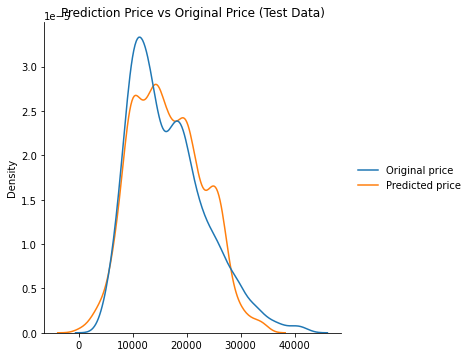

In [137]:
plot_prediction_compare_ori(sgd,title="Prediction Price vs Original Price (Test Data)")

<Figure size 432x288 with 0 Axes>

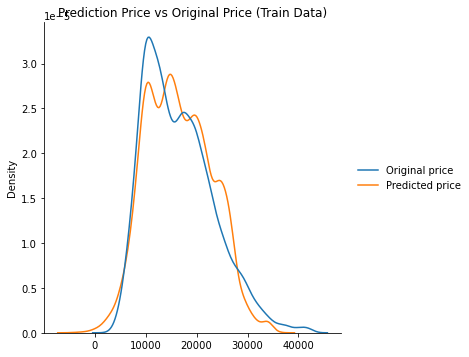

In [138]:
plot_prediction_compare_ori(sgd, X_train, y_train, title="Prediction Price vs Original Price (Train Data)")

In [139]:
regression_report_model(sgd)

Accuracy score: 			         0.8935
R-squared score: 			         0.8935
Mean Absolute Error(MAE): 		      1697.2510
Mean Squared Error (MSE): 		   5168296.3755
Root Mean Squared Error (RSME): 	      2273.3887


In [140]:
tuned_parameters={
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": [ "l1", "l2"],
    "loss":["squared_loss","huber","epsilon_insensitive"]
}


In [141]:
sgd_tuned = GridSearchCV(sgd,tuned_parameters, cv=5)
sgd_tuned.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before conv

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive'],
                         'penalty': ['l1', 'l2']})

In [142]:
train_test_report(sgd_tuned)

Train score: 		         0.8936
Test score: 		         0.8938


In [143]:
gs_report(sgd_tuned)

Best score: 			         0.8927
Best parameters: 		{'alpha': 0.1, 'loss': 'squared_loss', 'penalty': 'l1'}
Best estimator: 		SGDRegressor(alpha=0.1, penalty='l1')


In [144]:
regression_report_compare_model(sgd,sgd_tuned)

Before tuning hyperparameter: 

Accuracy score: 			         0.8935
R-squared score: 			         0.8935
Mean Absolute Error(MAE): 		      1697.2510
Mean Squared Error (MSE): 		   5168296.3755
Root Mean Squared Error (RSME): 	      2273.3887
-------------------------------------------------------
After tuning hyper parameter: 

Accuracy score: 			         0.8938
R-squared score: 			         0.8938
Mean Absolute Error(MAE): 		      1701.3181
Mean Squared Error (MSE): 		   5150642.8671
Root Mean Squared Error (RSME): 	      2269.5028


In [145]:
tuned_sgd_cv = cross_val_score(sgd_tuned,X,y,cv=3)
sgd_cv = cross_val_score(sgd,X,y,cv=3)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before conv

In [146]:
cv_df = pd.DataFrame({'Original SGD CV score': sgd_cv, 'Tuned SGD CV score': tuned_sgd_cv})
cv_df.mean()

Original SGD CV score    0.790035
Tuned SGD CV score       0.807125
dtype: float64

In [147]:
cv_df

,Original SGD CV score,Tuned SGD CV score
0,0.809553,0.823544
1,0.795471,0.797147
2,0.765081,0.800685


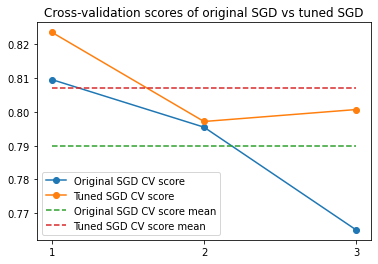

In [148]:
plt.figure()
plt.title('Cross-validation scores of original SGD vs tuned SGD')
plt.plot(cv_df['Original SGD CV score'], label='Original SGD CV score', marker='o')
plt.plot(cv_df['Tuned SGD CV score'], label='Tuned SGD CV score', marker='o')
# mean

plt.plot([cv_df['Original SGD CV score'].mean()] * len(cv_df), 
        label='Original SGD CV score mean', linestyle='--')
plt.plot([cv_df['Tuned SGD CV score'].mean()] * len(cv_df),
         label='Tuned SGD CV score mean', linestyle='--')
plt.xticks([0,1,2],[1,2,3])
plt.legend()
plt.show()

In [149]:
sgd_tuned.best_estimator_.coef_

array([-1410.34802843,  -822.6776425 , -1825.56159855,  2850.98398412,
       -2343.02677448,   868.48709414,  3277.78097577,   113.37037117,
       -1188.4086152 ,    80.60731717, -1480.68896585, -1924.34961198,
        1171.31353765,  1920.80529367,  2537.78338955,  2376.0177154 ,
        1999.6445924 ,  2468.73548572, -3221.79944063,  3529.64927788,
        2155.59183264,  3398.1628275 ,  4212.57217565,  4898.8666954 ])

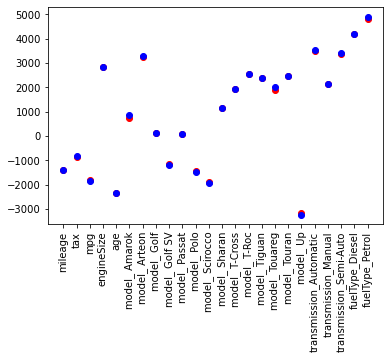

In [150]:
plt.scatter(X.columns,sgd.coef_,color='red')
plt.scatter(X.columns,sgd_tuned.best_estimator_.coef_,color='blue')
plt.xticks(rotation=90)
plt.show()

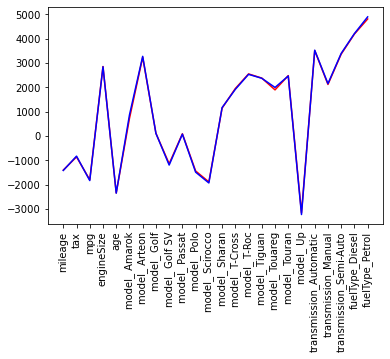

In [151]:
plt.plot(X.columns,sgd.coef_,color='red')
plt.plot(X.columns,sgd_tuned.best_estimator_.coef_,color='blue')
plt.xticks(rotation=90)
plt.show()